# Anomaly Detection with PyOD
Demonstrates IsolationForest and KNN detectors on synthetic data.

In [1]:
# Install
!pip install -q pyod matplotlib seaborn scikit-learn

zsh:1: command not found: pip


In [2]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import make_blobs
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
sns.set(style='whitegrid')
X, _ = make_blobs(n_samples=400, centers=3, cluster_std=0.6, random_state=42)
# inject anomalies
anom = np.random.uniform(low=-6, high=6, size=(20,2))
X_all = np.vstack([X, anom])

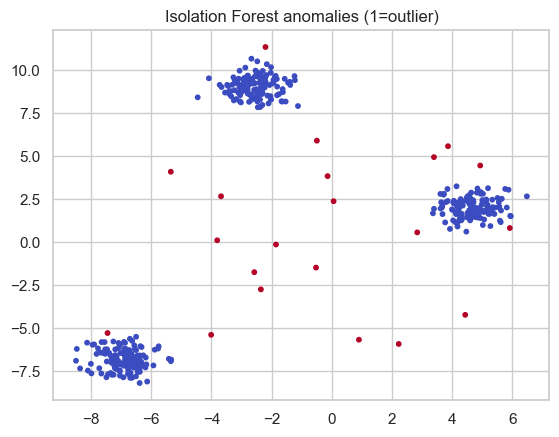

In [3]:
if_model = IForest(contamination=0.05, random_state=42)
if_model.fit(X_all)
labels_if = if_model.predict(X_all)
plt.scatter(X_all[:,0], X_all[:,1], c=labels_if, cmap='coolwarm', s=10)
plt.title('Isolation Forest anomalies (1=outlier)')
plt.show()

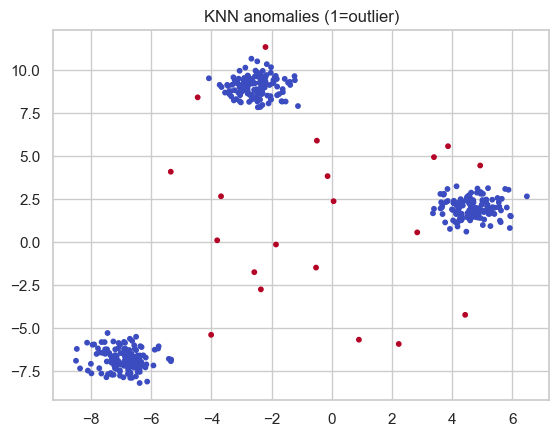

In [4]:
knn_model = KNN(contamination=0.05)
knn_model.fit(X_all)
labels_knn = knn_model.predict(X_all)
plt.scatter(X_all[:,0], X_all[:,1], c=labels_knn, cmap='coolwarm', s=10)
plt.title('KNN anomalies (1=outlier)')
plt.show()

## Notes
- Swap in time-series or multivariate features.
- Explore other PyOD models (COPOD, AutoEncoder).